In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Data Representation and Feature Engineering

- **Challenge**: Many machine learning algorithms require numerical input, and categorical variables are non-numeric.
- **Solution**: Represent categorical variables numerically through encoding techniques.

### Methods and Examples:

**Ordinal Encoding:**

- Method: Assign integer values to categories based on their order or ranking.
- Example: Education levels (low, medium, high) mapped to (1, 2, 3).

**One-Hot Encoding:**

-  Method: Create binary columns for each category, indicating its presence or absence.
-  Example: Gender categories (male, female) become two binary columns (0 or 1).

**Label Encoding:**

- Method: Assign a unique integer to each category.
- Example: Days of the week (Monday, Tuesday, ...) mapped to (1, 2, ...).

**Frequency Encoding:**

- Method: Encode categories based on their frequency of occurrence.
- Example: Encode city names based on how frequently they appear in a dataset.

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a DataFrame with a categorical column
data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Green']}
df = pd.DataFrame(data)

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical column
encoded_data = encoder.fit_transform(df[['Color']]).toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Color']))

# Display the result
print(encoded_df)


   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         0.0          0.0        1.0
4         0.0          1.0        0.0


## **Feature Engineering:**
**Overview**:

Definition: Feature Engineering involves creating new features or modifying existing features in a dataset to enhance the performance of machine learning models.

Objective: The goal is to provide the model with more relevant and informative input features, improving its ability to make accurate predictions.


### **Feature Interactions:**

Feature interactions refer to the relationships and dependencies between different features or variables in a dataset. Modeling feature interactions is crucial for capturing complex patterns in the data that cannot be adequately represented by individual features alone. By allowing features to interact, machine learning models can better adapt to the intricacies of the underlying relationships.

**importance:**

- Many real-world phenomena involve interactions between variables. For example, in predicting the price of a house, the combination of features like the number of bedrooms and the neighborhood might have a more significant impact than each feature individually.

**Methods to capture interactions**
- Polynomial Features: Introducing polynomial features allows the model to capture nonlinear interactions.

- Interaction Terms: Explicitly including interaction terms in the model (e.g., $Feature1 × Feature2$)

**Benefits:**

- Increased Modeling Power: Modeling feature interactions enhances the capacity of the model to capture complex relationships, improving predictive accuracy.
- Better Representation: Interaction terms provide a more nuanced representation of the underlying patterns in the data.

### **Polynomial Features:**

Polynomial features involve creating new features as powers of existing features. For instance, in a dataset with a feature $x$, adding $x^{2}$ as a new feature introduces a polynomial term. This is particularly useful when the relationship between the target variable and predictors is nonlinear.

- **Polynomial Regression**: Polynomial regression is a specific application of polynomial features. It extends linear regression by introducing polynomial terms, allowing the model to capture more complex relationships.

- **Trade-off**: While polynomial features increase the model's flexibility, there's a trade-off. Very high-degree polynomials can lead to overfitting, capturing noise rather than genuine patterns.

- **Practical considerations**: 
    - Feature Scaling: It's essential to scale features when using polynomial features to prevent some features from dominating due to their larger scale.

    - Model Complexity: The degree of the polynomial should be chosen carefully. A higher degree increases model complexity but may lead to overfitting.

- **Implementation in Python**: In Python, libraries like scikit-learn provide tools for adding polynomial features to datasets.

### Univariate Nonlinear Transformations

Univariate nonlinear transformations involve applying a mathematical function to a single variable or feature in a dataset. The goal is to capture complex relationships and patterns that may not be apparent in the original linear space. These transformations are particularly useful when the relationship between the input variable and the target variable is nonlinear.

Here are some key aspects of univariate nonlinear transformations:

1. Motivation:

    - Nonlinear Relationships: In many real-world scenarios, the relationship between a variable and the target is not linear. Univariate nonlinear transformations help the model capture these nonlinearities.
    - Better Fit: By transforming the feature, the model may achieve a better fit to the underlying patterns in the data.

2. Common Transformations:

- Logarithmic Transformation: $log(x)$
  - Useful when the impact of changes in $x$ is proportional to the current value of $x$. It compresses larger values and expands smaller ones.

- Square Root Transformation: $x$
​
  - Useful for reducing the impact of larger values, particularly when the variable has a right-skewed distribution.

- Exponential Transformation: $e^{x}$
  - Can be used to amplify the differences between smaller values.

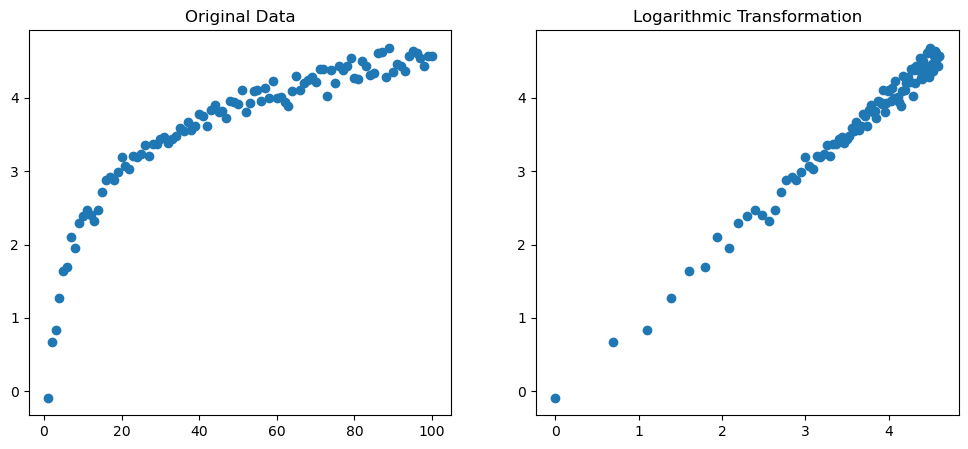

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(1, 100, 100)
y = np.log(x) + np.random.normal(0, 0.1, 100)

# Plot original and transformed data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.title("Original Data")

plt.subplot(1, 2, 2)
plt.scatter(np.log(x), y)
plt.title("Logarithmic Transformation")

plt.show()


*** 

## Automatic Feature Selection

### **Univariate Statistics**
Univariate statistics for feature selection involve evaluating the statistical relationship between each individual feature and the target variable. The goal is to select features that show a significant association with the target, filtering out less relevant features. 

Methods:

    SelectKBest
    SelectPercentile


In [42]:
# The test must be imported
from sklearn.feature_selection import f_classif # or f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris

# Load the iris dataset (classification example)
iris = load_iris()
X, y = iris.data, iris.target

# Use ANOVA for feature selection (select top 2 features)
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Display the selected features
print("Selected Features:", selector.get_support(indices=True))

Selected Features: [2 3]
